# Ford GoBike ride sharing data analysis

### Introduction:

Ford GoBike is Bay Area’s premier bikeshare system, and one of the largest in the nation. It offers hundreds of bikes and multiple stations in San Francisco Bay area and its available 24/7. 

Ford GoBike consists of a fleet of specially-designed, sturdy, and durable bikes that are locked into a network of docking stations in cities throughout the Bay Area. These bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. Bikeshare is a greener, healthier way to get around — whether you’re commuting, running errands, meeting friends for brunch, or exploring in a new city.

### Dataset Overview:

For the purpose of data analysis and visualization in this project, I'm focusing on the Ford GoBike bike sharing data for the month of January 2018 collected from the San Francisco Bay area. With this dataset I'm trying to find answers to few questions like:
- Who are the main users of the GoBike ride share service?
- What are the busiest times of the rides during the day?
- Which are the most popular ride sharing routes among the users?
- What is the duration of the rides for Subscribers and Customer?

and few more.

In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')
%matplotlib inline

### Visual  Assessment of the data

In [660]:
gobike=pd.read_csv('fordgobike_tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [661]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [662]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


### Data Wrangling Steps

In [663]:
# Creating customer age field
gobike['cust_age']=gobike['member_birth_year'].apply(lambda x:2019-int(x) if str(x)!='nan' else x)

In [664]:
# Creating Weekday Name and Day fields
gobike['start_time']=pd.to_datetime(gobike['start_time'])
gobike['wkday_nm']=gobike['start_time'].dt.weekday_name
gobike['day']=gobike['start_time'].dt.day

# Creating Week Day names as categorial field
wk_days=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
wk_day_catg=pd.api.types.CategoricalDtype(categories=wk_days,ordered=True)
gobike['wkday_nm']=gobike['wkday_nm'].astype(wk_day_catg)

In [665]:
gobike['cust_age'].describe()

count    86963.000000
mean        38.067580
std         10.803017
min         19.000000
25%         30.000000
50%         36.000000
75%         44.000000
max        119.000000
Name: cust_age, dtype: float64

In [666]:
# Converting user_type field into a categorial field.
cust_type=['Subscriber','Customer']
cust_class=pd.api.types.CategoricalDtype(ordered=False,categories=cust_type)
gobike['user_type']=gobike['user_type'].astype(cust_class)

In [667]:
# Creating Age Group bins
bins=[10,20,30,40,50,60,130]
labels=['11-20','21-30','31-40','41-50','51-60','60+']
gobike['age_grp']=pd.cut(gobike['cust_age'],bins=bins,labels=labels)

In [668]:
# Creating a field with starting and ending point of the ride
gobike['strt_end']=gobike['start_station_id'].astype(str)+' to '+gobike['end_station_id'].astype(str)

In [669]:
# Creating Subscribers and Customer datasets
cust_data=gobike[gobike['user_type']=='Customer']
subscr_data=gobike[gobike['user_type']=='Subscriber']

## Part I. Univariate Analysis

### Q - Who are the gobike ride users?

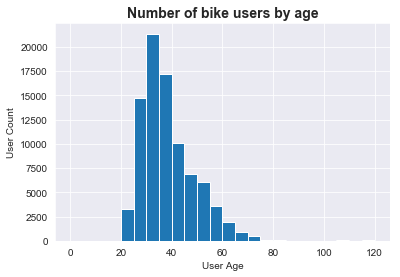

In [712]:
bins=np.arange(0,gobike['cust_age'].max()+5,5)
plt.hist(gobike['cust_age'],bins=bins)
plt.xlabel('User Age')
plt.ylabel('User Count')
plt.title('Number of bike users by age',fontsize=14,fontweight='semibold');

##### The customer age data is right skewed, with majority of the customers in the age range of 25 to 40.

### Q - During what time of the week are the gobikes used the most?

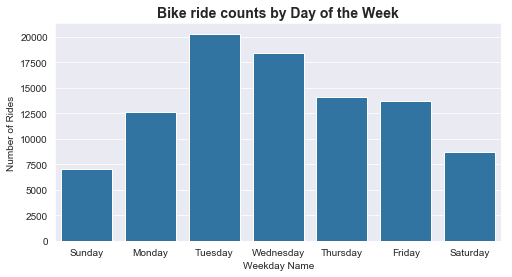

In [713]:
ride_cnt=gobike[['wkday_nm','bike_id']].groupby(['wkday_nm'],sort=False).count()
plt.figure(figsize=(8,4))
sns.countplot(data=gobike,x='wkday_nm',color=sns.color_palette()[0],order=wk_days)
plt.xlabel('Weekday Name')
plt.ylabel('Number of Rides')
plt.title('Bike ride counts by Day of the Week',fontsize=14,fontweight='semibold');

##### The gobikes are heavily used during the weekdays espically on Tuesdays and Wednesdays while they are least used during the weekends.

### Q - What are the durations of the gobike ride?

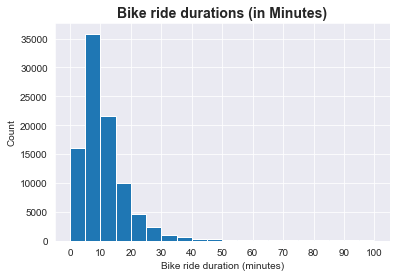

In [715]:
xticks=np.arange(0,100+10,10)
bins=np.arange(0,100+5,5)
dur_min=gobike['duration_sec'].apply(lambda x:x/60)
plt.hist(dur_min,range=(0,100),bins=bins)
plt.xticks(ticks=xticks)
plt.ylabel('Count')
plt.title('Bike ride durations (in Minutes)',fontsize=14,fontweight='semibold');
plt.xlabel('Bike ride duration (minutes)');

##### From the above chart we can say that usualy bike rides lasts for less than 20 min. with majority of them lasting for less than 10 min.

### Q - Which are the most travelled routes?

#### For Subscribers

In [674]:
# Creating top 10 most used subscriber routes
top_sub_rout=subscr_data['strt_end'].value_counts().reset_index()
top_sub_rout=top_sub_rout[top_sub_rout.index<=9]
top_sub_routes=list(top_sub_rout['index'])

# Generating Start and End station route Names

gobike['route_statns']=gobike['start_station_name']+" -- "+gobike['end_station_name']
top_sub_rout_nm=gobike[gobike['strt_end'].isin(top_sub_routes)][['route_statns','strt_end']]
top_sub_rout.rename(columns={'index':'strt_end','strt_end':'route_counts'},inplace=True)

# Merging 2 data frames to get names of top 10 routes

top_sub_rout=top_sub_rout.merge(top_sub_rout_nm,on=['strt_end']).drop_duplicates()

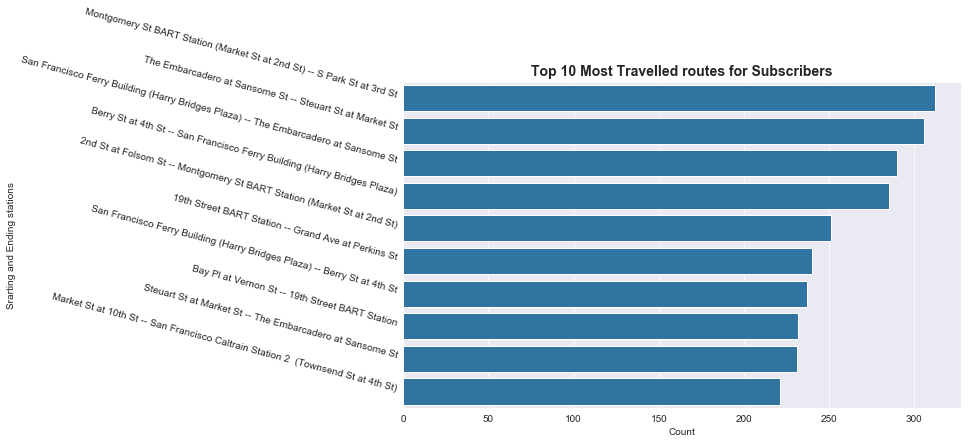

In [720]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_sub_rout,y='route_statns',x='route_counts',color=sns.color_palette()[0])
plt.yticks(fontsize=10,wrap=True,rotation=-15)
plt.xlabel('Count')
plt.ylabel('Srarting and Ending stations')
plt.title('Top 10 Most Travelled routes for Subscribers',fontsize=14,fontweight='semibold');

##### From the above data we can see that most of the subscribers use the bike ride to go to or to come from the nearest BART stations, which suggest that these subscribers use these rides to commute to their work, colleges, etc.

#### For Customers

In [676]:
# Creating top 10 most used customers' routes
top_cust_rout=cust_data['strt_end'].value_counts().reset_index()
top_cust_rout=top_cust_rout[top_cust_rout.index<=9]
top_cust_routes=list(top_cust_rout['index'])

# Generating Start and End station route Names

#gobike['route_statns']=gobike['start_station_name']+" -- "+gobike['end_station_name']
top_cust_rout_nm=gobike[gobike['strt_end'].isin(top_cust_routes)][['route_statns','strt_end']]
top_cust_rout.rename(columns={'index':'strt_end','strt_end':'route_counts'},inplace=True)

# Merging 2 data frames to get names of top 10 routes

top_cust_rout=top_cust_rout.merge(top_cust_rout_nm,on=['strt_end']).drop_duplicates()

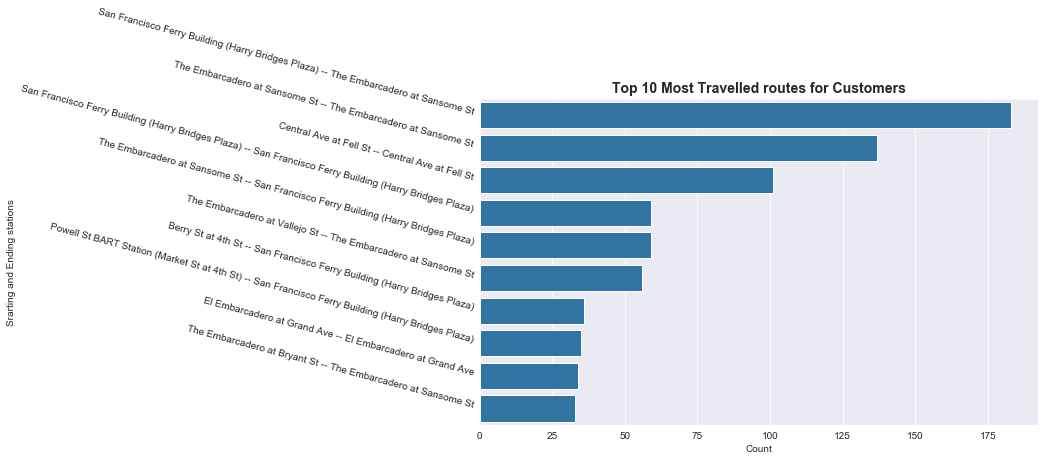

In [721]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cust_rout,y='route_statns',x='route_counts',color=sns.color_palette()[0])
plt.yticks(fontsize=10)
plt.yticks(fontsize=10,wrap=True,rotation=-15)
plt.xlabel('Count')
plt.ylabel('Srarting and Ending stations')
plt.title('Top 10 Most Travelled routes for Customers',fontsize=14,fontweight='semibold');

##### From customers data we can see that many rides start from or end to Harry Bridges Plaza which is a popular meeting and public hangout spot in SF which suggest that the customers (many of these may be tourists) use these rides for leisure activities.

## Bivariate Analysis

### Q - What is the percentage of Subscribers to Customers?

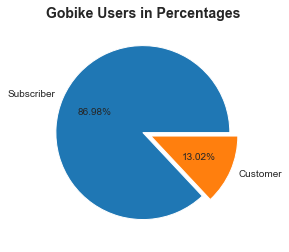

In [726]:
plt.figure(figsize=(4,4))
cust_types=gobike['user_type'].value_counts()
plt.pie(cust_types,labels=cust_types.index,autopct='%.2f%%',explode=(0,0.1))
plt.title("Gobike Users in Percentages",fontsize=14,fontweight='semibold');

##### From the above chart we can say that almost 9 out of 10 users of gobike ride service are subscribers. Also, these users are mostly male users.

### Q - How are the users distributed by gender?

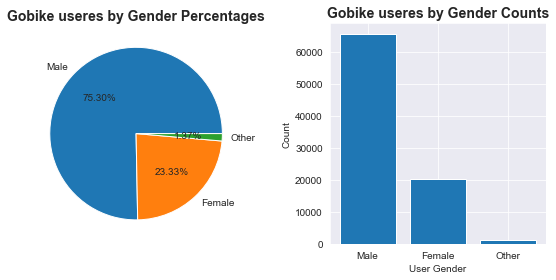

In [728]:
gender_types=gobike['member_gender'].value_counts()

fig,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].pie(gender_types,labels=gender_types.index,autopct='%.2f%%')
axes[1].bar(gender_types.index,gender_types.values)
axes[1].set_xlabel('User Gender')
axes[1].set_ylabel('Count')
axes[0].set_title('Gobike useres by Gender Percentages',fontsize=14,fontweight='semibold')
axes[1].set_title('Gobike useres by Gender Counts',fontsize=14,fontweight='semibold')
plt.tight_layout();

##### Out of all the users, 75% users of the gobike are male users.

### Q - Most busiest bike ride time and duration?

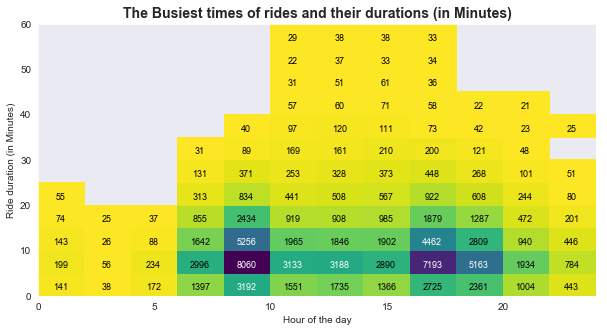

In [733]:
plt.figure(figsize=(10,5))
g=plt.hist2d(data=gobike,x='start_hr',y=gobike['duration_sec'].apply(lambda x:int(x/60)),range=([0,24],[0,60]),
           cmap='viridis_r',bins=(bins_x,bins_y),cmin=20)
cnt=g[0]
for i in range(cnt.shape[0]):
    for j in range(cnt.shape[1]):
        val=cnt[i][j]
        if val>=3000:
            plt.text(bins_x[i]+0.95,bins_y[j]+1.8,int(val),ha='center',va='center',color='white',fontsize=9)
        elif val>=20:
            plt.text(bins_x[i]+0.95,bins_y[j]+1.8,int(val),ha='center',va='center',color='black',fontsize=9)
plt.title("The Busiest times of rides and their durations (in Minutes)",fontsize=14,fontweight='semibold')
plt.ylabel("Ride duration (in Minutes)")
plt.xlabel("Hour of the day");

##### From the heatmap we can see that, during morning hours most bikes are used before 10 am for durations between 5 to 15 min. While during evening hours the busiest time for bike rides is between 4 and 8 pm, again for durations between 5 to 15 min. This may support our earlier assumption that most of these bikes are used for commuting to/from work by the members.

### Q - What is the average bike ride time?

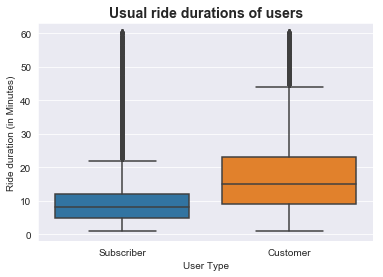

In [734]:
gobike['dur_min']=gobike['duration_sec'].apply(lambda x:int(x/60))
sub=gobike[(gobike['dur_min']>=0) & (gobike['dur_min']<=60)]
sns.boxplot(data=sub,y='dur_min',x='user_type')
plt.title("Usual ride durations of users",fontsize=14,fontweight='semibold')
plt.xlabel("User Type")
plt.ylabel("Ride duration (in Minutes)");

##### From the above visual we can see that the for subscribers the bike ride generally lasts between 7 to 12 minutes, while for customers it usually lasts for around 10 to 22 minutes.

## Multivariate Analysis

### Q - What is the duration of the rides differs in the week for Subscribers and Customers?

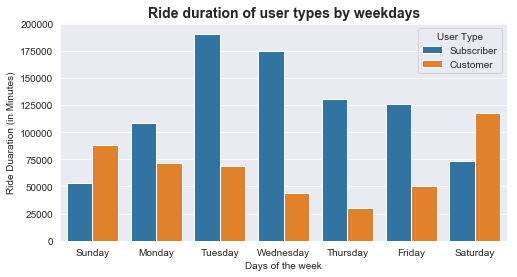

In [743]:
plt.figure(figsize=(8,4))
sns.barplot(data=gobike,x='wkday_nm',y='dur_min',order=wk_days,estimator=sum,hue='user_type',ci=None)
plt.legend(gobike['user_type'],title='User Type')
plt.title("Ride duration of user types by weekdays",fontsize=14,fontweight='semibold')
plt.xlabel("Days of the week")
plt.ylabel("Ride Duaration (in Minutes)");

##### From the above chart it is evident that subscribers mostly use the bike ride service during the weekdays while customers use the bike ride most during the weekends, suggesting furthur evidence to our assumption that subscribers are mostly using it for commuting to and from their work/college etc. whereas the customers use it for leisure activities.

### Q - How are the bikes ride counts and duration different in January for Subscribes and Customers?

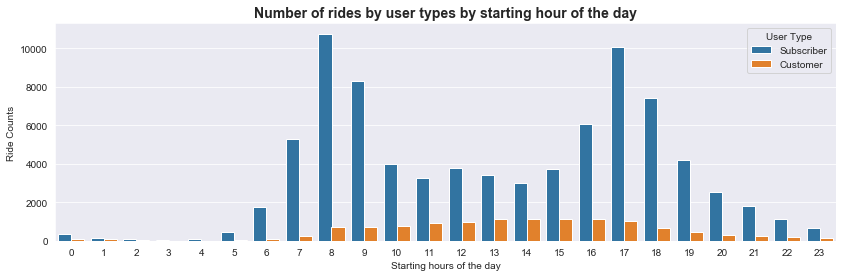

In [745]:
plt.figure(figsize=(14,4))
sns.countplot(data=gobike,x='start_hr',hue='user_type')
plt.legend(gobike['user_type'],title='User Type')
plt.title("Number of rides by user types by starting hour of the day",fontsize=14,fontweight='semibold')
plt.xlabel("Starting hours of the day")
plt.ylabel("Ride Counts");

##### Due to very large number of subscribers as compared to customers, the number of bikes used during each hour of the day is much high for subscribers.

(Interestingly, this visualization too look like the SF bridge **:-)**)

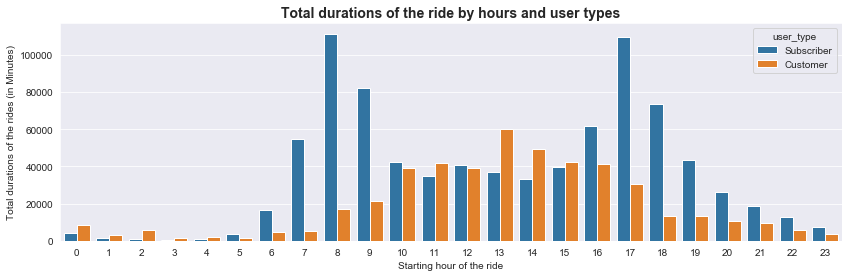

In [747]:
plt.figure(figsize=(14,4))
sns.barplot(data=gobike,x='start_hr',y='dur_min',estimator=sum,hue='user_type',ci=None)
plt.title("Total durations of the ride by hours and user types",fontsize=14,fontweight='semibold')
plt.xlabel("Starting hour of the ride")
plt.ylabel("Total durations of the rides (in Minutes)");

##### Even though the number of bike rides is very high for subscribers, interestingly the bike ride duration for customers is high during the hours between 11 am to 3 pm. Also, the total ride durations in January  2018 is above 100,000 minutes for rides starting in the morning around 8 am and during evening hours around 5 pm which generally are the pick hours of the everday commuters.

### Q - How the ride time durations differs by gender for Subscribers and Customers?

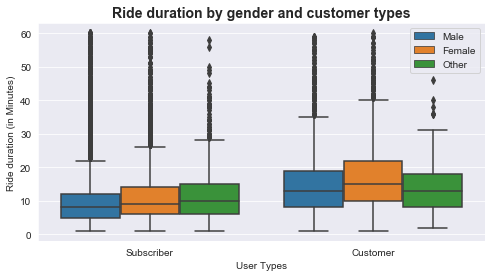

In [748]:
plt.figure(figsize=(8,4))
sns.boxplot(data=sub,x=sub['user_type'],y=sub['dur_min'],hue='member_gender')
plt.legend(loc=0)
plt.title("Ride duration by gender and customer types",fontsize=14,fontweight='semibold')
plt.xlabel("User Types")
plt.ylabel("Ride duration (in Minutes)");

##### The bike ride duration is slightly more for female users. While for male subscribers the usual ride duration is between 7 to 12 min, for female subscribers it is slightly more between 8 to 14 minutes. Also, for male customers, the normal ride duration is between 9 to 20 minutes, for female customers it is  is between 10 to 22 min.

### Q - How are the bike ride users distributed by age groups?

In [687]:
top_age_data=age_data[['bike_id','age_grp','day']].groupby(['age_grp','day'],as_index=False).count().dropna()

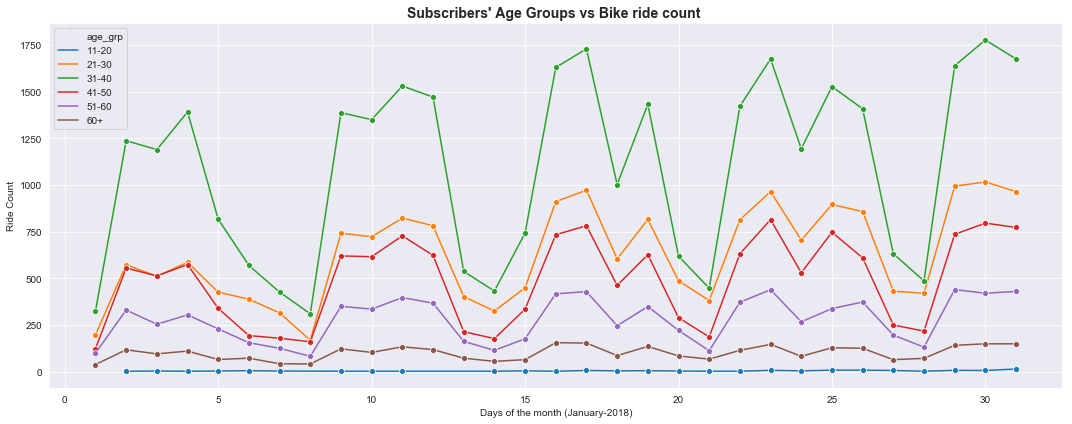

In [756]:
plt.figure(figsize=(15,6))
sns.lineplot(data=subr_age_data,x='day',y='bike_id',hue='age_grp',ci=None,marker='o')
plt.title("Subscribers' Age Groups vs Bike ride count ",fontsize=14,fontweight='semibold')
plt.xlabel('Days of the month (January-2018)')
plt.ylabel('Ride Count')
plt.tight_layout()

##### Majority of the subscribers are from the age group 21 to 40 years which forms a major workforce in current corporate environment.

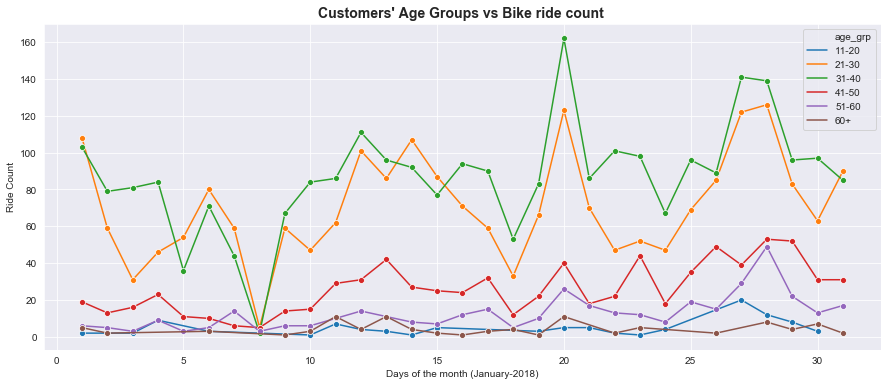

In [758]:
plt.figure(figsize=(15,6))
sns.lineplot(data=cust_age_data,x='day',y='bike_id',hue='age_grp',ci=None,marker='o')
plt.title("Customers' Age Groups vs Bike ride count ",fontsize=14,fontweight='semibold')
plt.xlabel('Days of the month (January-2018)')
plt.ylabel('Ride Count');

##### Similar to subscribers, the majority of the gobike customers belong to the same age group of 21 to 40 years.

# Conclusion:

From the above analysis of the GoBike dataset we can conclude that almost 9 out of 10 users of these ride sharing service is a subscriber and almost 7 out of 10 of these subscribers are men. These subscribers mostly use the ride share service for short commutes most of which is to the nearest BART station while the customers use these bikes to visit spots which are popular among students, tourists and young crowd (e.g. Harry Bridges Plaza), suggesting these rides are mostly leisure or city touring activities. The ride durations for subscibers usually lasts between 7 to 15 minutes while for customers it lasts between 10 to 22 minutes.

Since, Bay area being a popular hub of startups and tech companies, the majority of the workforce of these companies consists of young people below the age of 40 years. The subscibers that mostly uses these ride share services also belong to the same age group, which may suggest that these subscribers are the young (and maybe tech savvy) people that use these bikes to commute between their work and home location. Another supporting fact to this assumption is that the most number of bike rides start around 8 in the morning and around 5 in the evening, which normally are the rush hours of the office commutes. Another interesting fact is, most bikes are used by the subscribers during the weekdays while most of the bikes are used by customers in the weekends. 